---
title: Activity 9.2
author: Alexa Dandridge
format:
    html:
        embed-resources: true
        code-line numbers: true

---
**GitHub Repository** <https://github.com/alexadandridge/Positron-Class-Week-0->


Our dataset consists of clinical data from patients who entered the hospital complaining of chest pain ("angina") during exercise.  The information collected includes:

* `age` : Age of the patient

* `sex` : Sex of the patient

* `cp` : Chest Pain type

    + Value 0: asymptomatic
    + Value 1: typical angina
    + Value 2: atypical angina
    + Value 3: non-anginal pain
   
    
* `trtbps` : resting blood pressure (in mm Hg)

* `chol` : cholesterol in mg/dl fetched via BMI sensor

* `restecg` : resting electrocardiographic results

    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

* `thalach` : maximum heart rate achieved during exercise

* `output` : the doctor's diagnosis of whether the patient is at risk for a heart attack
    + 0 = not at risk of heart attack
    + 1 = at risk of heart attack

In [41]:
# Importing items
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [42]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")

In [43]:
ha = pd.read_csv("https://www.dropbox.com/s/aohbr6yb9ifmc8w/heart_attack.csv?dl=1")
ha["cp_is_3"] = (ha["cp"] == 3) * 1
ha["cp_is_2"] = (ha["cp"] == 2) * 1
ha["cp_is_1"] = (ha["cp"] == 1) * 1
ha["cp_is_0"] = (ha["cp"] == 0) * 1

# I made cp a string just for plotting purposes
ha["cp"] = ha["cp"].astype("str")
ha

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,1,0,0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
268,59,1,0,164,176,0,90,0,0,0,0,1
269,57,0,0,140,241,1,123,0,0,0,0,1
270,45,1,3,110,264,1,132,0,1,0,0,0
271,68,1,0,144,193,1,141,0,0,0,0,1


In [ ]:
%pip install plotnine
from plotnine import *  # noqa: F403


In [45]:
ha["cp"].value_counts().sort_index()

cp
0    128
1     44
2     81
3     20
Name: count, dtype: int64

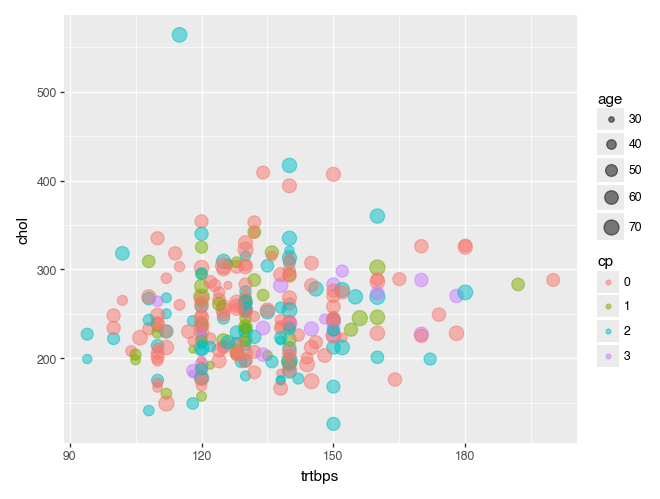

In [ ]:
(ggplot(ha, aes(x="trtbps", y="chol", size = "age", color="cp"))  # noqa: F405
+ geom_point(alpha = 0.5))  # noqa: F405


## Q1: Natural Multiclass Models

Fit a multiclass KNN, Decision Tree, and LDA for the heart disease data; this time predicting the type of chest pain (categories 0 - 3) that a patient experiences.  For the decision tree, plot the fitted tree, and interpret the first couple splits.


In [47]:
X = ha[["trtbps", "chol", "age"]]
y = ha["cp"]

# Fitting a KNN Model
knn_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", KNeighborsClassifier(n_neighbors=5))]
)

knn_model.fit(X, y)


Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsClassifier())])

In [48]:
# Fitting an LDA model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = Pipeline(
  [("standardize", StandardScaler()),
   ("lda", LinearDiscriminantAnalysis())]
)

lda_model_fitted = lda_model.fit(X, y)

lda_model_fitted

Pipeline(steps=[('standardize', StandardScaler()),
                ('lda', LinearDiscriminantAnalysis())])

In [49]:
# Fitting a decisison tree
dt_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", DecisionTreeClassifier(max_depth=2))]
)

dt_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', DecisionTreeClassifier(max_depth=2))])

In [50]:
from sklearn.tree import plot_tree

plot_tree(dt_model.named_steps["model"], feature_names=["trtbps", "chol", "age"], filled=True)

[Text(0.5, 0.8333333333333334, 'age <= -0.311\ngini = 0.661\nsamples = 273\nvalue = [128, 44, 81, 20]'),
 Text(0.25, 0.5, 'trtbps <= 0.193\ngini = 0.679\nsamples = 95\nvalue = [32, 20, 38, 5]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, 'gini = 0.692\nsamples = 73\nvalue = [21, 20, 28, 4]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.541\nsamples = 22\nvalue = [11, 0, 10, 1]'),
 Text(0.75, 0.5, 'trtbps <= 0.051\ngini = 0.625\nsamples = 178\nvalue = [96, 24, 43, 15]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, 'gini = 0.558\nsamples = 90\nvalue = [55.0, 15.0, 18.0, 2.0]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.67\nsamples = 88\nvalue = [41.0, 9.0, 25.0, 13.0]')]

Age seems to be the most powerful predictor as it first splits younger and older people into two groups. Within each age group, trtbps is the next predictor, which splits the age groups into four new groups total.  

In [51]:
ha[['age', 'trtbps']].mean(), ha[['age', 'trtbps']].std()


(age        54.347985
 trtbps    132.098901
 dtype: float64,
 age        9.163134
 trtbps    17.700358
 dtype: float64)

## Q2:  OvR

Create a new column in the `ha` dataset called `cp_is_3`, which is equal to `1` if the `cp` variable is equal to `3` and `0` otherwise.

Then, fit a Logistic Regression to predict this new target, and report the **F1 Score**.

Repeat for the other three `cp` categories.  Which category was the OvR approach best at distinguishing?

In [52]:
ha["cp"] = pd.to_numeric(ha["cp"], errors="coerce")
ha["cp_is_3"] = (ha["cp"] == 3) * 1
ha.head()

,age,sex,cp,trtbps,chol,restecg,thalach,output,cp_is_3,cp_is_2,cp_is_1,cp_is_0
0,63,1,3,145,233,0,150,1,1,0,0,0
1,37,1,2,130,250,1,187,1,0,1,0,0
2,56,1,1,120,236,1,178,1,0,0,1,0
3,57,0,0,120,354,1,163,1,0,0,0,1
4,57,1,0,140,192,1,148,1,0,0,0,1


In [53]:
ha[["cp", "cp_is_3"]].head()


,cp,cp_is_3
0,3,1
1,2,0
2,1,0
3,0,0
4,0,0


In [54]:
X = ha[["trtbps", "chol", "age"]]
y = ha["cp_is_3"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))]
)

logistic_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [55]:
# Showing class distribution
print(y.value_counts(normalize=True))


cp_is_3
0    0.92674
1    0.07326
Name: proportion, dtype: float64


In [56]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=321)

In [57]:
from sklearn.model_selection import cross_val_score
cross_val_score(logistic_model, X, y,
                                cv=5, scoring="f1").mean()

np.float64(0.17693946677454922)

In [58]:
ha["cp"] = pd.to_numeric(ha["cp"], errors="coerce")
ha["cp_is_2"] = (ha["cp"] == 2) * 1

In [59]:
X = ha[["trtbps", "chol", "age"]]
y = ha["cp_is_2"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))]
)

logistic_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [60]:
# Showing class distribution
print(y.value_counts(normalize=True))

cp_is_2
0    0.703297
1    0.296703
Name: proportion, dtype: float64


In [61]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=321)

In [62]:
cross_val_score(logistic_model, X, y,
                                cv=5, scoring="f1").mean()

np.float64(0.37708751393534)

In [63]:
ha["cp"] = pd.to_numeric(ha["cp"], errors="coerce")
ha["cp_is_1"] = (ha["cp"] == 1) * 1

In [64]:
X = ha[["trtbps", "chol", "age"]]
y = ha["cp_is_1"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))]
)

logistic_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [65]:
# Showing class distribution
print(y.value_counts(normalize=True))

cp_is_1
0    0.838828
1    0.161172
Name: proportion, dtype: float64


In [66]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=321)

In [67]:
cross_val_score(logistic_model, X, y,
                                cv=5, scoring="f1").mean()

np.float64(0.2752615292777565)

In [68]:
ha["cp"] = pd.to_numeric(ha["cp"], errors="coerce")
ha["cp_is_0"] = (ha["cp"] == 1) * 1

In [69]:
X = ha[["trtbps", "chol", "age"]]
y = ha["cp_is_0"]


logistic_model =Pipeline(
    [("scale", StandardScaler()),
    ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))]
)

logistic_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [70]:
# Showing class distribution
print(y.value_counts(normalize=True))

cp_is_0
0    0.838828
1    0.161172
Name: proportion, dtype: float64


In [71]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=321)

In [72]:
cross_val_score(logistic_model, X, y,
                                cv=5, scoring="f1").mean()

np.float64(0.2752615292777565)

The cp_is_2 category was the best because it had the highest F1 score of 0.37. CP_is_3 had a score of 0.17, and cp_is_1 and cp_is_0 both had a score of 0.27.

## Q3: OvO

Reduce your dataset to only the `0` and `1` types of chest pain.

Then, fit a Logistic Regression to predict between the two groups, and report the **ROC-AUC**.  

Repeat comparing category `0` to `2` and `3`.  Which pair was the OvO approach best at distinguishing?

In [73]:
ha_01 = ha[(ha["cp"] == 0) | (ha["cp"] == 1)]

X = ha_01[["trtbps", "chol", "age"]]
y = ha_01["cp"]


logistic_model =Pipeline(
    [('scale', StandardScaler()),
    ('model', LogisticRegression())]
)

logistic_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [74]:
cross_val_score(logistic_model, X, y,
                                cv=5, scoring="roc_auc").mean()

np.float64(0.6016623931623932)

In [75]:
ha_02 = ha[(ha["cp"] == 0) | (ha["cp"] == 2)]

X = ha_02[["trtbps", "chol", "age"]]
y = ha_02["cp"]


logistic_model =Pipeline(
    [('scale', StandardScaler()),
    ('model', LogisticRegression())]
)

logistic_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [76]:
cross_val_score(logistic_model, X, y,
                                cv=5, scoring="roc_auc").mean()

np.float64(0.5593246606334841)

In [77]:
ha_03 = ha[(ha["cp"] == 0) | (ha["cp"] == 3)]

X = ha_03[["trtbps", "chol", "age"]]
y = ha_03["cp"]


logistic_model =Pipeline(
    [('scale', StandardScaler()),
    ('model', LogisticRegression())]
)

logistic_model.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', LogisticRegression())])

In [78]:
cross_val_score(logistic_model, X, y,
                                cv=5, scoring="roc_auc").mean()

np.float64(0.5585384615384615)

The model comparing 0 to 1 is the best because it has the highest ROC-AUC value.